### Research Question:

*How does public interest in economic factors, as reflected by search trends, relate to actual international trade dynamics, domestic financial sector performance, and exchange rate fluctuations, and what is the combined impact on the economic landscape of Turkey?*

This question seeks to understand the relationship between the public's expressed interests in economic matters (via search trends) and actual economic performance metrics. It explores the connection between public sentiment, international trade activities, domestic financial health, and currency valuation, all of which are integral to the nation's economic vitality and its position in the global market.

The data encompasses four distinct categories:

- Exports: This series highlights the trade balance and provides a window into the health of the external sector of the economy. Analyzing export data alongside public search interest in exports offers insight into the public’s perception of trade performance.

- Banking Sector Loans: This series is an indicator of domestic financial sector performance. It reflects the banking sector's lending activity and, by extension, the confidence and investment propensity within the economy. Combined with search data on loans and interest rates, it may reveal public reaction to changing financial conditions.

- Exchange Rates: This series is a gauge of the country's monetary policy effectiveness and its interactions with the global financial system. The actual exchange rate movements coupled with search trends for "dollar to lira" can provide an indication of public concern or interest in monetary value and purchasing power.

- Search Data: The inclusion of search trends for loans, interest rates, exports, and "dollar to lira" provides a novel dimension to assess the public's response to economic changes. It serves as a proxy for economic sentiment and potential preemptive behaviors in anticipation of economic shifts.

#### Data Loading and Exploration

In [203]:
import pandas as pd

# Load the EVDS data
evds_data = pd.read_excel('EVDS.xlsx')

# Display the first few rows of the data 
evds_data.head()

,Tarih,TP METALIHR G71,TP KREHACBS A1,TP DK USD A YTL
0,2019-01,530613.447,2237478776,5.369391
1,2019-02,504900.498,2278756436,5.262055
2,2019-03,607212.009,2365119989,5.441938
3,2019-04,572002.473,2401894835,5.735771
4,2019-05,685690.995,2389456228,6.049445


In [204]:
# Rename the columns: Tarih to Date, TP METALIHR G71 to Export Total, TP KREHACBS A1 to Total Domestic loan volume and TP HKFE01 to Housing Price Index
evds_data.rename(columns={'Tarih': 'Date', 'TP METALIHR G71': 'Export Total', 'TP KREHACBS A1': 'Total Domestic loan volume', 'TP DK USD A YTL': 'Exchange Rates'}, inplace=True)

evds_data.head()

,Date,Export Total,Total Domestic loan volume,Exchange Rates
0,2019-01,530613.447,2237478776,5.369391
1,2019-02,504900.498,2278756436,5.262055
2,2019-03,607212.009,2365119989,5.441938
3,2019-04,572002.473,2401894835,5.735771
4,2019-05,685690.995,2389456228,6.049445


In [205]:
# Convert the date column to datetime, and the remaining columns to numeric
evds_data['Date'] = pd.to_datetime(evds_data['Date'], errors='coerce')

# Convert the remaining columns to numeric, coercing errors to NaN
evds_data['Export Total'] = pd.to_numeric(evds_data['Export Total'], errors='coerce')
evds_data['Total Domestic loan volume'] = pd.to_numeric(evds_data['Total Domestic loan volume'], errors='coerce')
evds_data['Exchange Rates'] = pd.to_numeric(evds_data['Exchange Rates'], errors='coerce')

# Check the resulting data types
evds_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        61 non-null     datetime64[ns]
 1   Export Total                61 non-null     float64       
 2   Total Domestic loan volume  61 non-null     int64         
 3   Exchange Rates              61 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 2.0 KB


In [206]:
# A function to automate converting the date column to datetime and Search Volume to integer

def preprocess_data(df, date_column='Week', search_volume_column='Custom Search Volume', search_volume_new_name='Custom Search Volume'):
    """
    Preprocesses the data by renaming the specified date column to 'Date', 
    converting it to datetime, and converting the specified search volume 
    column to numeric with a new specified name.

    Parameters:
    - df: pandas DataFrame to preprocess.
    - date_column: Name of the column to rename to 'Date' and convert to datetime. Default is 'Week'.
    - search_volume_column: Name of the column to convert to numeric. Default is 'Search Volume'.
    - search_volume_new_name: New name for the search volume column after conversion. Default is 'Custom Search Volume'.

    Returns:
    - The preprocessed pandas DataFrame.
    """
    # Check if the date column exists in the DataFrame
    if date_column in df.columns:
        # Rename the date column to 'Date' and convert it to datetime
        df[date_column] = pd.to_datetime(df[date_column])
        df.rename(columns={date_column: 'Date'}, inplace=True)
    else:
        print(f"Column '{date_column}' not found in the DataFrame.")

    # Check if the search volume column exists in the DataFrame
    if search_volume_column in df.columns:
        # Convert the search volume column to numeric, coercing errors
        df[search_volume_column] = pd.to_numeric(df[search_volume_column], errors='coerce')
        # Rename the search volume column to the new specified name
        df.rename(columns={search_volume_column: search_volume_new_name}, inplace=True)
    else:
        print(f"Column '{search_volume_column}' not found in the DataFrame.")

    return df

In [207]:
# Load and inspect the Google Trends data for "exports"
exports_data = pd.read_csv('exports.csv')

# Display the first few rows of the data 
exports_data.head()

,Week,Search Volume
0,12/30/2018,48
1,1/6/2019,52
2,1/13/2019,46
3,1/20/2019,45
4,1/27/2019,47


In [208]:
# Processing the exports data
exports_data = preprocess_data(exports_data, date_column='Week', search_volume_column='Search Volume', search_volume_new_name='Exports Search Volume')

exports_data.head()

,Date,Exports Search Volume
0,2018-12-30,48
1,2019-01-06,52
2,2019-01-13,46
3,2019-01-20,45
4,2019-01-27,47


In [209]:
# Load and inspect the Google Trends data for "USD-Lira"
usd_lira_data = pd.read_csv('USD-Lira.csv')

# Display the first few rows of the data 
usd_lira_data.head()

,Week,Search Volume
0,12/30/2018,11
1,1/6/2019,11
2,1/13/2019,12
3,1/20/2019,9
4,1/27/2019,9


In [210]:
# Processing the house price data
house_price_data = preprocess_data(usd_lira_data, date_column='Week', search_volume_column='Search Volume', search_volume_new_name='USD-Lira Search Volume')

house_price_data.head()

,Date,USD-Lira Search Volume
0,2018-12-30,11
1,2019-01-06,11
2,2019-01-13,12
3,2019-01-20,9
4,2019-01-27,9


In [211]:
# Load and inspect the Google Trends data for "loan"
loan_data = pd.read_csv('loan.csv')

# Inspection of the first few rows of the data
loan_data.head()

,Week,Search Volume
0,12/30/2018,52
1,1/6/2019,68
2,1/13/2019,72
3,1/20/2019,62
4,1/27/2019,62


In [212]:
# Processing the loan data
loan_data = preprocess_data(loan_data, date_column='Week', search_volume_column='Search Volume', search_volume_new_name='Loan Search Volume')

loan_data.head()

,Date,Loan Search Volume
0,2018-12-30,52
1,2019-01-06,68
2,2019-01-13,72
3,2019-01-20,62
4,2019-01-27,62


In [213]:
# Load the interest rate data
interest_rate_data = pd.read_csv('interest rates.csv')

interest_rate_data.head()

,Week,Search Volume
0,12/30/2018,0
1,1/6/2019,55
2,1/13/2019,27
3,1/20/2019,23
4,1/27/2019,33


In [214]:
interest_rate_data = preprocess_data(interest_rate_data, date_column='Week', search_volume_column='Search Volume', search_volume_new_name='Interest Rate Search Volume')

interest_rate_data.head()

,Date,Interest Rate Search Volume
0,2018-12-30,0
1,2019-01-06,55
2,2019-01-13,27
3,2019-01-20,23
4,2019-01-27,33


In [215]:
# Setting the 'Date' column as the index for each DataFrame
def set_date_as_index(df):
    """
    Sets the 'Date' column as the index of the DataFrame.

    Parameters:
    - df: pandas DataFrame to set the 'Date' column as index.

    Returns:
    - The DataFrame with the 'Date' column as index.
    """
    if 'Date' in df.columns:
        df.set_index('Date', inplace=True)
    else:
        print("Column 'Date' not found in the DataFrame.")

    return df

# Set the 'Date' column as the index for each DataFrame
evds_data = set_date_as_index(evds_data)
exports_data = set_date_as_index(exports_data)
usd_lira_data = set_date_as_index(usd_lira_data)
loan_data = set_date_as_index(loan_data)
interest_rate_data = set_date_as_index(interest_rate_data)

In [216]:
exports_data.head(), loan_data.head(), interest_rate_data.head(), usd_lira_data.head()

(            Exports Search Volume
 Date                             
 2018-12-30                     48
 2019-01-06                     52
 2019-01-13                     46
 2019-01-20                     45
 2019-01-27                     47,
             Loan Search Volume
 Date                          
 2018-12-30                  52
 2019-01-06                  68
 2019-01-13                  72
 2019-01-20                  62
 2019-01-27                  62,
             Interest Rate Search Volume
 Date                                   
 2018-12-30                            0
 2019-01-06                           55
 2019-01-13                           27
 2019-01-20                           23
 2019-01-27                           33,
             USD-Lira Search Volume
 Date                              
 2018-12-30                      11
 2019-01-06                      11
 2019-01-13                      12
 2019-01-20                       9
 2019-01-27              

In [217]:
# A function to aggregate the weekly data to monthly averages
def aggregate_weekly_data_to_monthly(df):
    """
    Aggregates the weekly data to monthly averages.

    Parameters:
    - df: pandas DataFrame with weekly data to aggregate.

    Returns:
    - The DataFrame with weekly data aggregated to monthly averages.
    """
    # Resample the weekly data to monthly frequency, taking the mean of each month
    df_monthly = df.resample('M').mean()

    return df_monthly

exports_data = aggregate_weekly_data_to_monthly(exports_data)
usd_lira_data = aggregate_weekly_data_to_monthly(usd_lira_data)
loan_data = aggregate_weekly_data_to_monthly(loan_data)
interest_rate_data = aggregate_weekly_data_to_monthly(interest_rate_data)

In [218]:
exports_data.head(), usd_lira_data.head(), loan_data.head(), interest_rate_data.head(), evds_data.head()

(            Exports Search Volume
 Date                             
 2018-12-31                   48.0
 2019-01-31                   47.5
 2019-02-28                   50.5
 2019-03-31                   50.4
 2019-04-30                   47.5,
             USD-Lira Search Volume
 Date                              
 2018-12-31                   11.00
 2019-01-31                   10.25
 2019-02-28                    7.75
 2019-03-31                   10.40
 2019-04-30                   13.00,
             Loan Search Volume
 Date                          
 2018-12-31               52.00
 2019-01-31               66.00
 2019-02-28               51.25
 2019-03-31               49.60
 2019-04-30               52.50,
             Interest Rate Search Volume
 Date                                   
 2018-12-31                         0.00
 2019-01-31                        34.50
 2019-02-28                        23.25
 2019-03-31                        33.80
 2019-04-30                   

In [219]:
evds_data.index = pd.to_datetime(evds_data.index).to_period('M').to_timestamp('M')

evds_data.head()

,Export Total,Total Domestic loan volume,Exchange Rates
Date,,,
2019-01-31,530613.447,2237478776,5.369391
2019-02-28,504900.498,2278756436,5.262055
2019-03-31,607212.009,2365119989,5.441938
2019-04-30,572002.473,2401894835,5.735771
2019-05-31,685690.995,2389456228,6.049445


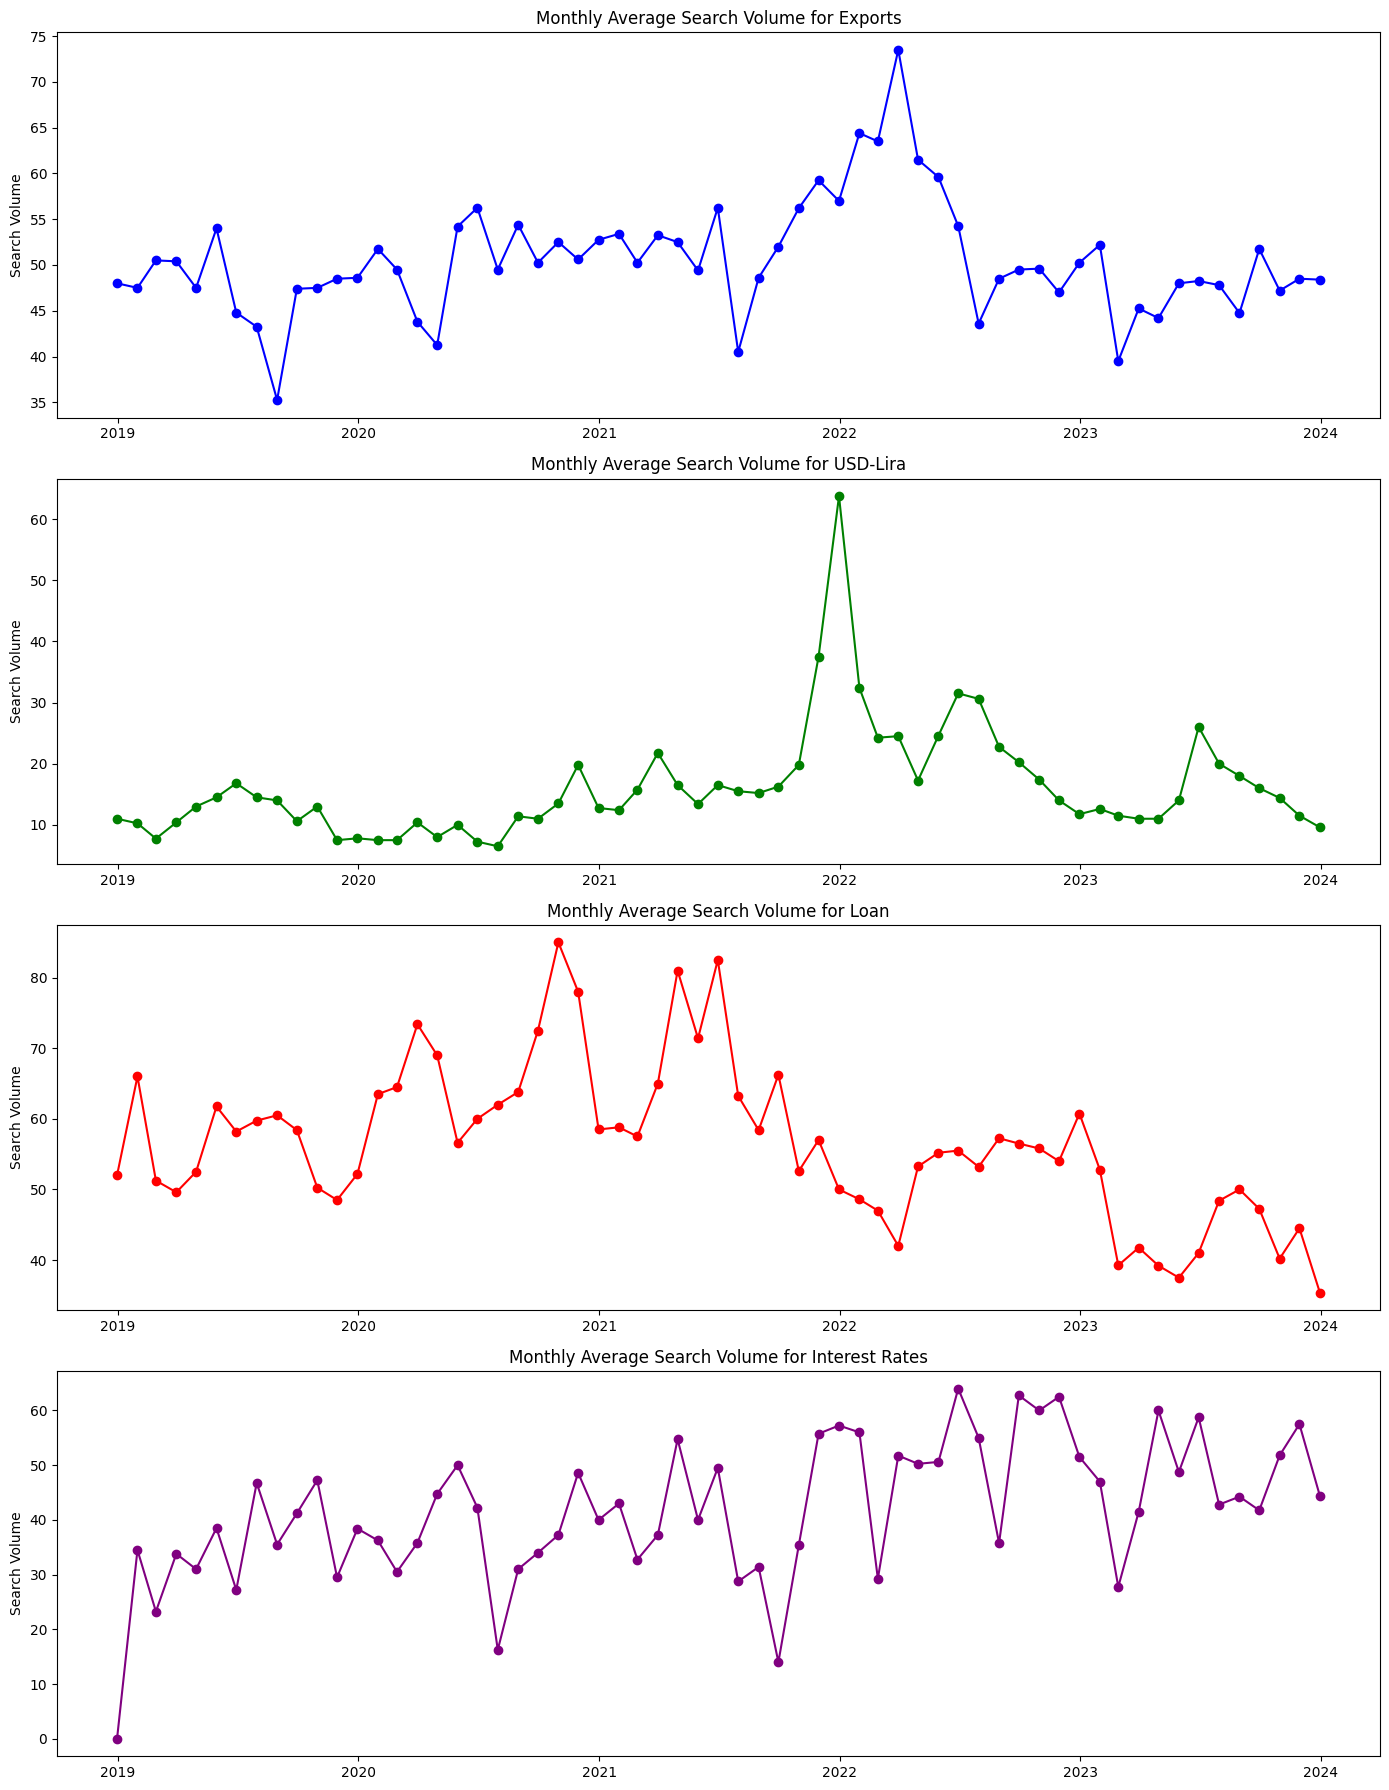

In [220]:
import matplotlib.pyplot as plt

# Plotting the monthly averages of Google Trends data
fig, axs = plt.subplots(4, 1, figsize=(14, 18))

# Exports
axs[0].plot(exports_data.index, exports_data['Exports Search Volume'], marker='o', linestyle='-', color='blue')
axs[0].set_title('Monthly Average Search Volume for Exports')
axs[0].set_ylabel('Search Volume')

# USD-Lira
axs[1].plot(usd_lira_data.index, usd_lira_data['USD-Lira Search Volume'], marker='o', linestyle='-', color='green')
axs[1].set_title('Monthly Average Search Volume for USD-Lira')
axs[1].set_ylabel('Search Volume')

# Loan
axs[2].plot(loan_data.index, loan_data['Loan Search Volume'], marker='o', linestyle='-', color='red')  # Typo in column name corrected here visually
axs[2].set_title('Monthly Average Search Volume for Loan')
axs[2].set_ylabel('Search Volume')

# Interest Rates
axs[3].plot(interest_rate_data.index, interest_rate_data['Interest Rate Search Volume'], marker='o', linestyle='-', color='purple')
axs[3].set_title('Monthly Average Search Volume for Interest Rates')
axs[3].set_ylabel('Search Volume')

plt.tight_layout()
plt.show()

In [221]:
# To proceed with correlation analysis, we need to merge the EVDS data with the Google Trends aggregated monthly data

# Merge the datasets
merged_data = pd.concat([exports_data, usd_lira_data, loan_data, interest_rate_data, evds_data], axis=1)

merged_data.head()

,Exports Search Volume,USD-Lira Search Volume,Loan Search Volume,Interest Rate Search Volume,Export Total,Total Domestic loan volume,Exchange Rates
Date,,,,,,,
2018-12-31,48.0,11.00,52.00,0.00,NaN,NaN,NaN
2019-01-31,47.5,10.25,66.00,34.50,530613.447,2.237479e+09,5.369391
2019-02-28,50.5,7.75,51.25,23.25,504900.498,2.278756e+09,5.262055
2019-03-31,50.4,10.40,49.60,33.80,607212.009,2.365120e+09,5.441938
2019-04-30,47.5,13.00,52.50,31.00,572002.473,2.401895e+09,5.735771


In [222]:
merged_data.tail()

,Exports Search Volume,USD-Lira Search Volume,Loan Search Volume,Interest Rate Search Volume,Export Total,Total Domestic loan volume,Exchange Rates
Date,,,,,,,
2023-09-30,51.75,16.0,47.25,41.75,1456309.749,1.012549e+10,26.940919
2023-10-31,47.20,14.4,40.20,51.80,1603218.298,1.039186e+10,27.796032
2023-11-30,48.50,11.5,44.50,57.50,1858470.328,1.071692e+10,28.585586
2023-12-31,48.40,9.6,35.40,44.40,1238145.856,1.105349e+10,29.022562
2024-01-31,NaN,NaN,NaN,NaN,792472.585,1.130267e+10,29.999700


In [223]:
# Missing values in the merged data

merged_data.isnull().sum()

Exports Search Volume          1
USD-Lira Search Volume         1
Loan Search Volume             1
Interest Rate Search Volume    1
Export Total                   1
Total Domestic loan volume     1
Exchange Rates                 1
dtype: int64

In [224]:
# Remove the rows with missing values

merged_data = merged_data.dropna()

merged_data.head()

,Exports Search Volume,USD-Lira Search Volume,Loan Search Volume,Interest Rate Search Volume,Export Total,Total Domestic loan volume,Exchange Rates
Date,,,,,,,
2019-01-31,47.5,10.25,66.00,34.50,530613.447,2.237479e+09,5.369391
2019-02-28,50.5,7.75,51.25,23.25,504900.498,2.278756e+09,5.262055
2019-03-31,50.4,10.40,49.60,33.80,607212.009,2.365120e+09,5.441938
2019-04-30,47.5,13.00,52.50,31.00,572002.473,2.401895e+09,5.735771
2019-05-31,54.0,14.50,61.75,38.50,685690.995,2.389456e+09,6.049445


In [225]:
# Calculate the correlation matrix
correlation_matrix = merged_data.corr()

correlation_matrix

,Exports Search Volume,USD-Lira Search Volume,Loan Search Volume,Interest Rate Search Volume,Export Total,Total Domestic loan volume,Exchange Rates
Exports Search Volume,1.000000,0.392223,-0.012436,0.191372,0.118514,-0.076069,-0.033142
USD-Lira Search Volume,0.392223,1.000000,-0.132359,0.432305,0.320125,0.152409,0.217165
Loan Search Volume,-0.012436,-0.132359,1.000000,-0.205953,-0.397948,-0.610021,-0.607690
Interest Rate Search Volume,0.191372,0.432305,-0.205953,1.000000,0.431869,0.463123,0.497160
Export Total,0.118514,0.320125,-0.397948,0.431869,1.000000,0.711499,0.710382
Total Domestic loan volume,-0.076069,0.152409,-0.610021,0.463123,0.711499,1.000000,0.988613
Exchange Rates,-0.033142,0.217165,-0.607690,0.497160,0.710382,0.988613,1.000000


The high correlation between Exchange Rates and Total Domestic Loan Volume suggests that currency valuation is a critical factor influencing domestic lending and, by extension, economic activity.

The relationship between Exchange Rates and Loan Search Volume may highlight public sensitivity to economic conditions, with changes in currency valuation influencing perceptions of financial stability and borrowing intentions.

The correlation between Exchange Rates and Export Total supports the notion that exchange rate movements can directly impact trade dynamics, influencing the volume of exports.

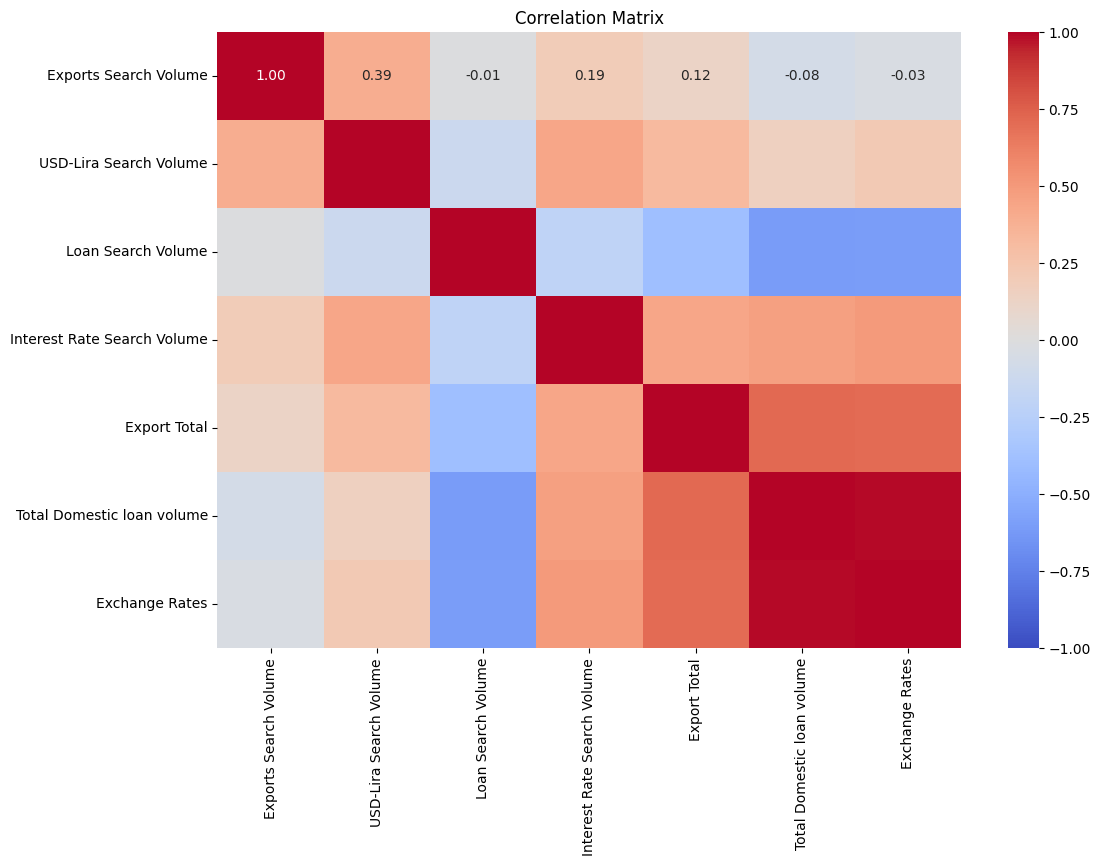

In [226]:
# Plot the correlation matrix

import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt = ".2f")
plt.title('Correlation Matrix')
plt.show()

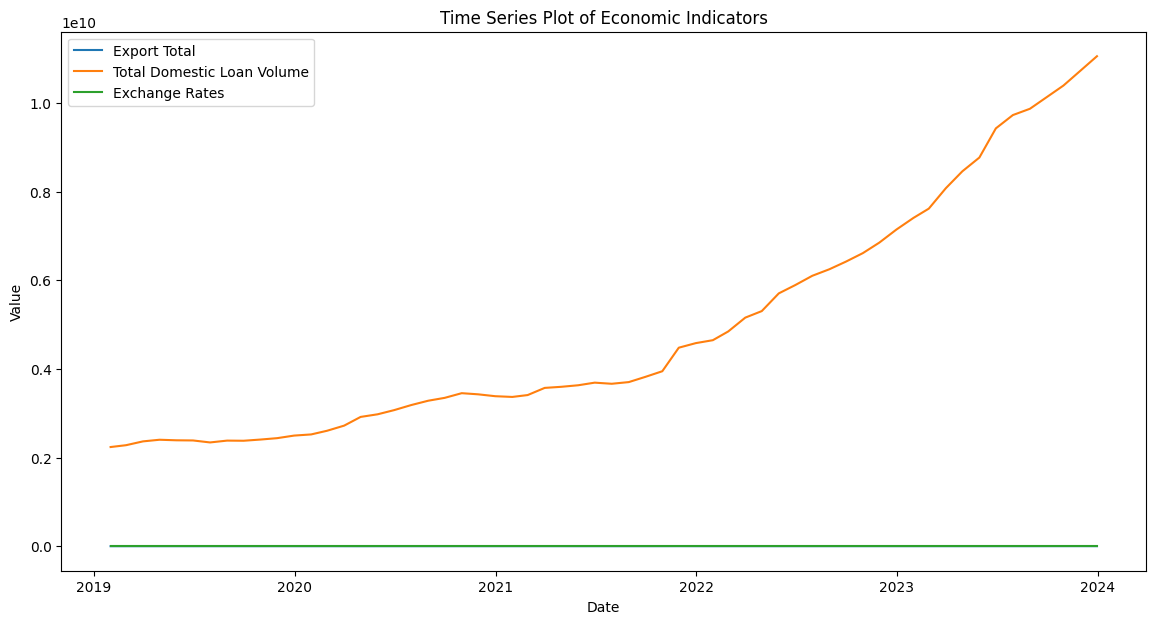

In [227]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(merged_data.index, merged_data['Export Total'], label='Export Total')
plt.plot(merged_data.index, merged_data['Total Domestic loan volume'], label='Total Domestic Loan Volume')
plt.plot(merged_data.index, merged_data['Exchange Rates'], label='Exchange Rates')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Plot of Economic Indicators')
plt.legend()
plt.show()

#### Modelling

##### Model 1 - Exchange Rates

In [228]:
Y = merged_data['Exchange Rates']
X = merged_data[['Exports Search Volume', 'USD-Lira Search Volume', 'Loan Search Volume', 'Interest Rate Search Volume']]

split_point = int(len(X) * 0.8)
X_train, X_test = X[:split_point], X[split_point:]
Y_train, Y_test = Y[:split_point], Y[split_point:]

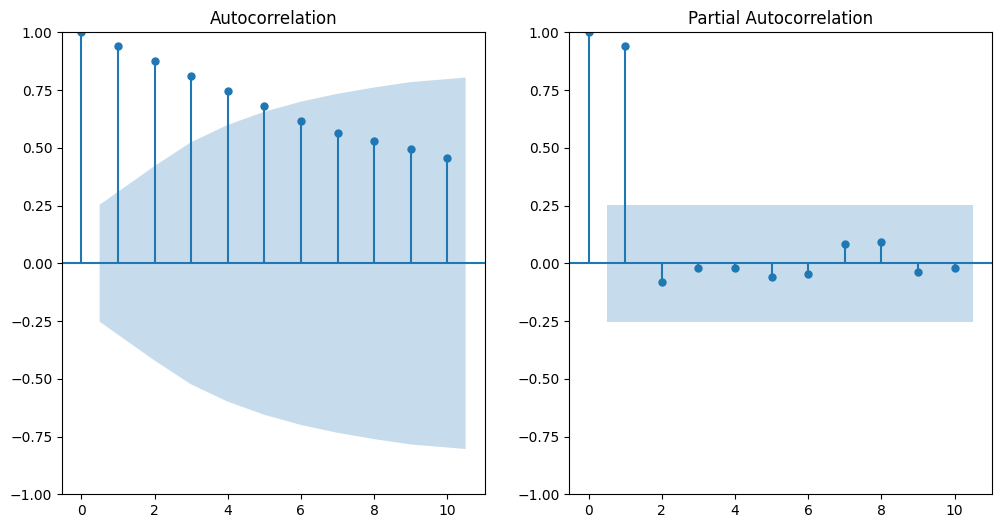

In [229]:
# Building a ARIMA Model 

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

exchange_rates = merged_data['Exchange Rates']

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(exchange_rates, ax=plt.gca(), lags=10)
plt.subplot(122)
plot_pacf(exchange_rates, ax=plt.gca(), lags=10)
plt.show()

In [230]:
# Grid search to get ARIMA values
import itertools
import warnings
warnings.filterwarnings("ignore")

# Define the p, d, and q ranges to test
p = range(0, 3)  
d = range(0, 2)  
q = range(0, 3) 
pdq = list(itertools.product(p, d, q))

# Grid search
best_aic = float('inf')
best_order = None
best_model = None

for param in pdq:
    try:
        temp_model = ARIMA(exchange_rates, order=param)
        results = temp_model.fit()
        
        # Compare current model's AIC with the best so far
        if results.aic < best_aic:
            best_aic = results.aic
            best_order = param
            best_model = results
    except:  # Handle cases where the model fails to converge
        continue

print(f'Best ARIMA{best_order} AIC: {best_aic}')
print(best_model.summary())

Best ARIMA(1, 1, 2) AIC: 123.804131348858
                               SARIMAX Results                                
Dep. Variable:         Exchange Rates   No. Observations:                   60
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 -57.902
Date:                Wed, 27 Mar 2024   AIC                            123.804
Time:                        08:57:34   BIC                            132.114
Sample:                    01-31-2019   HQIC                           127.048
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9888      0.098     10.043      0.000       0.796       1.182
ma.L1         -0.3126      0.158     -1.977      0.048      -0.623      -0.003
ma.L2     

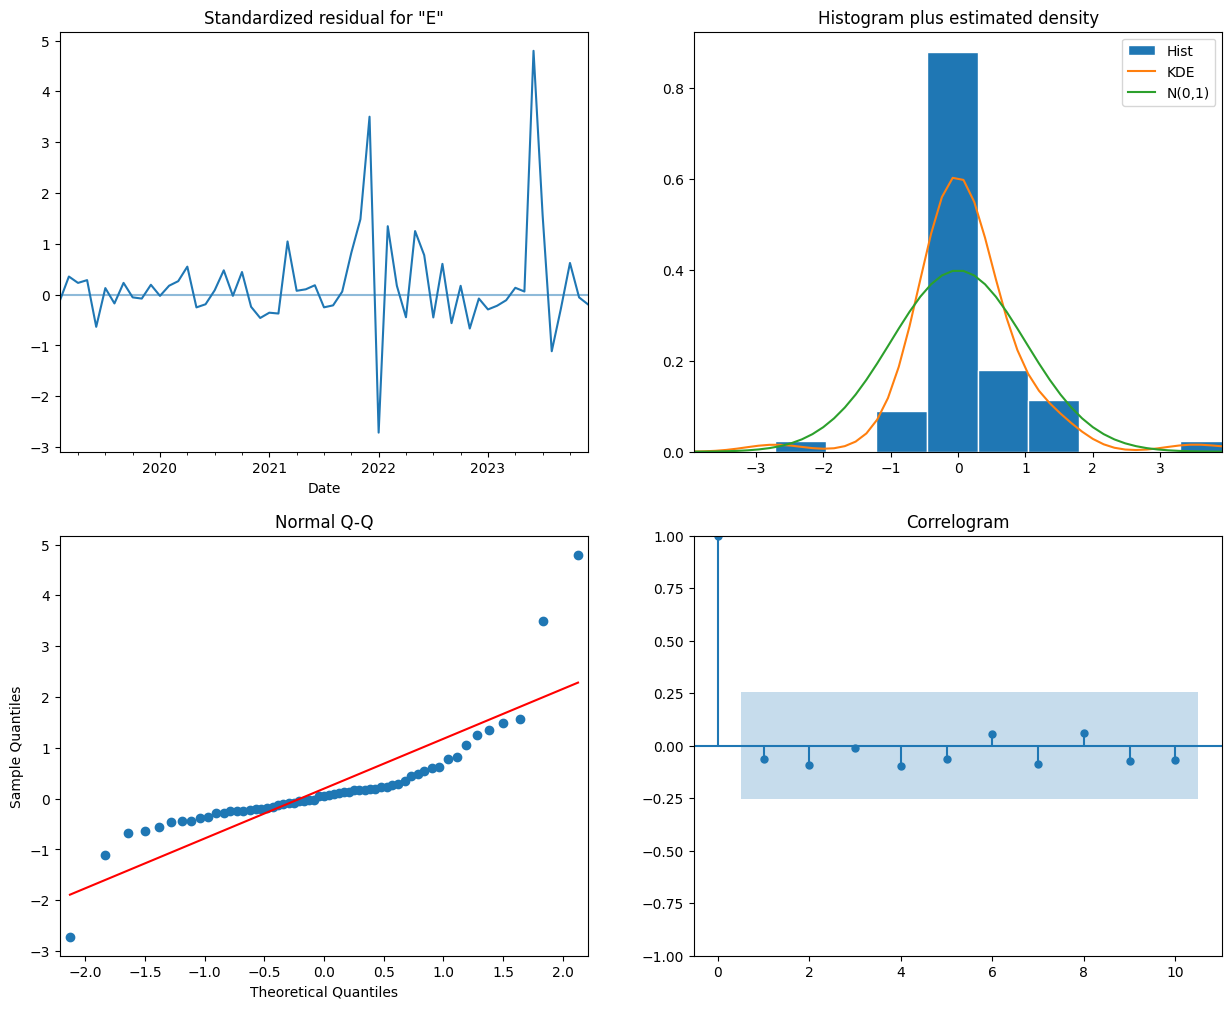

In [231]:
best_model.plot_diagnostics(figsize=(15, 12))
plt.show()

ar.L1 (AR term): The coefficient of nearly 1 (0.9888) with a p-value < 0.001 indicates a strong positive autoregressive effect and is statistically significant. This suggests that the exchange rate from the previous time period has a substantial influence on the current period's rate. ma.L1 and ma.L2 (MA terms): The coefficients for the MA terms are both significant with p-values < 0.05. The ma.L1 coefficient is negative, while ma.L2 is more negative. This indicates a complex moving average process where the effects of past shocks are being smoothed out over time.

Ljung-Box Test: The Q statistic has a p-value of 0.63, suggesting that there is no significant autocorrelation at lag 1, and the model seems to have captured the autocorrelation structure of the data.
Jarque-Bera Test: A JB statistic with a p-value close to 0.00 indicates that the residuals of the model do not follow a normal distribution, implying potential issues with the model assumptions.
Heteroskedasticity: The very low p-value for the H statistic suggests that there is significant heteroskedasticity in the model, meaning the variance of the residuals is not constant over time.

Overall, while the model seems to have captured some of the dynamics in the "Exchange Rates" time series with significant AR and MA terms, the diagnostics suggest potential issues with the distribution of the residuals and the presence of heteroskedasticity. The normal Q-Q plot deviating from the line, particularly in the tails, and the histogram indicate non-normality, which could affect hypothesis testing and confidence intervals. The standardized residuals show some large spikes, implying potential outliers or periods where the model does not fit well.

##### Model 2: Export Total

In [241]:
# Log transformation Exports total to stabilize variance
import numpy as np

merged_data['Log Export Total'] = np.log(merged_data['Export Total'])

merged_data[['Export Total', 'Log Export Total']].head()

,Export Total,Log Export Total
Date,,
2019-01-31,530613.447,13.181789
2019-02-28,504900.498,13.132117
2019-03-31,607212.009,13.316633
2019-04-30,572002.473,13.256899
2019-05-31,685690.995,13.438182


In [242]:
# Define the dependent and independent variables
y_export = merged_data['Log Export Total']
X_export = merged_data[['Exports Search Volume', 'USD-Lira Search Volume', 'Loan Search Volume', 'Interest Rate Search Volume']]

split_point = int(len(X) * 0.8)
X_train, X_test = X[:split_point], X[split_point:]
Y_train, Y_test = Y[:split_point], Y[split_point:]

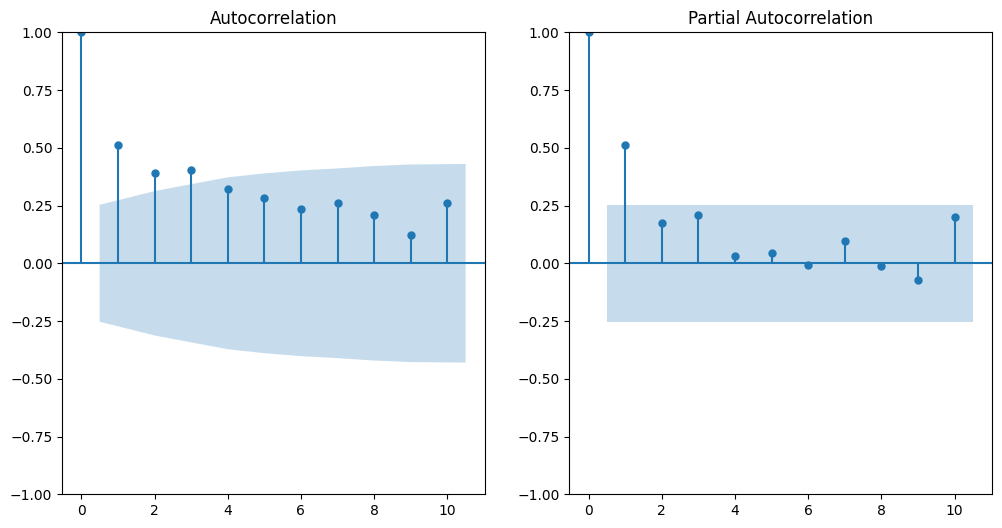

In [243]:
# Building a ARIMA Model due to presence of autocorrelation and potential issues with normality of residuals

exports_total = merged_data['Log Export Total']

# Plot ACF and PACF
plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(exports_total, ax=plt.gca(), lags=10)
plt.subplot(122)
plot_pacf(exports_total, ax=plt.gca(), lags=10)
plt.show()

In [244]:
# Grid search to get ARIMA values

# Define the p, d, and q ranges to test
p = range(0, 3)  
d = range(0, 2)  
q = range(0, 3) 
pdq = list(itertools.product(p, d, q))

# Grid search
best_aic = float('inf')
best_order = None
best_model = None

for param in pdq:
    try:
        temp_model = ARIMA(exports_total, order=param)
        results = temp_model.fit()
        
        # Compare current model's AIC with the best so far
        if results.aic < best_aic:
            best_aic = results.aic
            best_order = param
            best_model = results
    except:  # Handle cases where the model fails to converge
        continue
    
print(f"Best ARIMA{best_order} AIC: {best_aic}")
print(best_model.summary())

Best ARIMA(0, 1, 1) AIC: 39.27200787128729
                               SARIMAX Results                                
Dep. Variable:       Log Export Total   No. Observations:                   60
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -17.636
Date:                Wed, 27 Mar 2024   AIC                             39.272
Time:                        09:04:49   BIC                             43.427
Sample:                    01-31-2019   HQIC                            40.894
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7077      0.093     -7.636      0.000      -0.889      -0.526
sigma2         0.1052      0.008     13.027      0.000       0.089       0.121
Ljung-Box

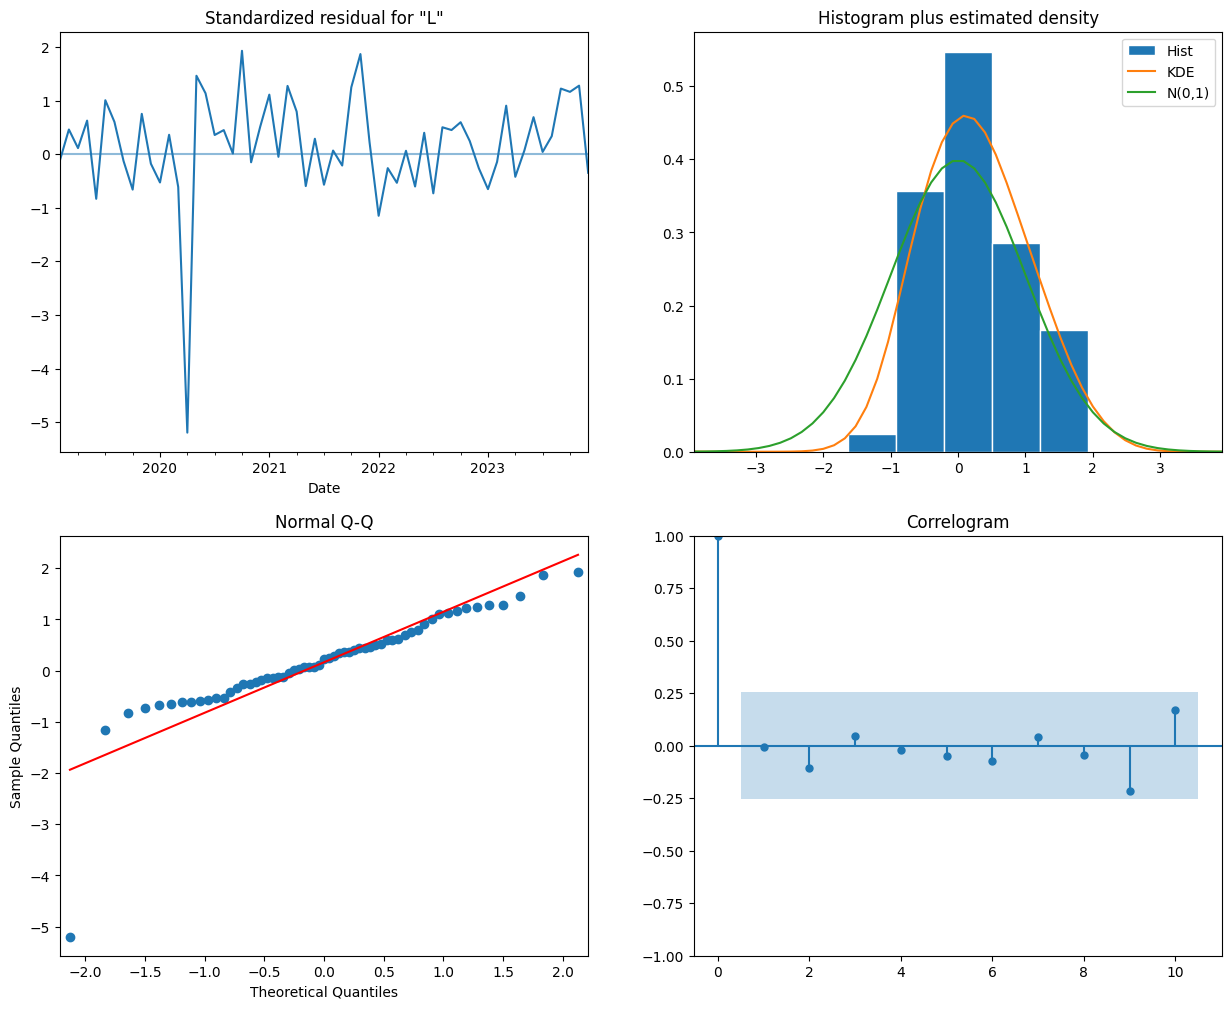

In [245]:
best_model.plot_diagnostics(figsize=(15, 12))
plt.show()

ma.L1 (MA term): The significant coefficient value of -0.7077 suggests a substantial moving average component.

Ljung-Box Test: The high p-value (0.97) suggests there is no significant autocorrelation in the residuals, indicating that the model captures the time series dependencies well.
Jarque-Bera Test: The very low p-value indicates that the residuals are not normally distributed, signifying a potential violation of the model assumptions. This is consistent with the very high skewness and kurtosis values, indicating a very long-tailed distribution of residuals.
Heteroskedasticity Test (H): The low p-value indicates significant heteroskedasticity, meaning the variance of residuals is not constant across time.

##### Model 3 - Total Domestic Loan Volume

In [251]:
# Log transformation of the dependent variable
merged_data['Log Domestic Loan Volume'] = np.log(merged_data['Total Domestic loan volume'])

merged_data[['Total Domestic loan volume', 'Log Domestic Loan Volume']].head()

,Total Domestic loan volume,Log Domestic Loan Volume
Date,,
2019-01-31,2.237479e+09,21.528616
2019-02-28,2.278756e+09,21.546896
2019-03-31,2.365120e+09,21.584095
2019-04-30,2.401895e+09,21.599524
2019-05-31,2.389456e+09,21.594332


In [252]:
# Define the dependent and independent variables
y_total_loan = merged_data['Log Domestic Loan Volume']
X_total_loan = merged_data[['Exports Search Volume', 'USD-Lira Search Volume', 'Loan Search Volume', 'Interest Rate Search Volume']]

split_point = int(len(X) * 0.8)
X_train, X_test = X[:split_point], X[split_point:]
Y_train, Y_test = Y[:split_point], Y[split_point:]

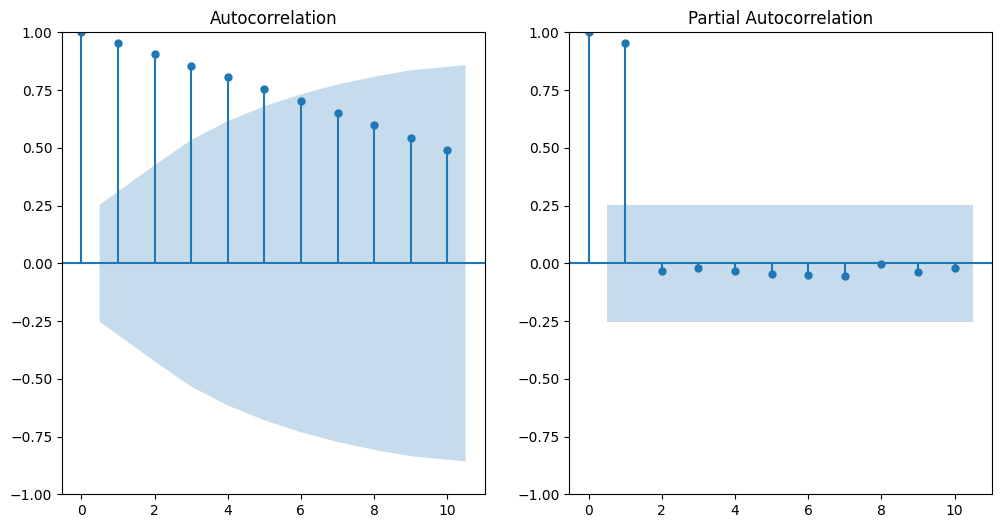

In [253]:
# ARIMA Model for Total Domestic Loan Volume

total_loan_volume = merged_data['Log Domestic Loan Volume']

# Plot ACF and PACF
plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(total_loan_volume, ax=plt.gca(), lags=10)
plt.subplot(122)
plot_pacf(total_loan_volume, ax=plt.gca(), lags=10)
plt.show()

In [254]:
# Grid search to get ARIMA values

# Define the p, d, and q ranges to test
p = range(0, 3)
d = range(0, 2)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))

# Grid search
best_aic = float('inf')
best_order = None
best_model = None

for param in pdq:
    try:
        temp_model = ARIMA(total_loan_volume, order=param)
        results = temp_model.fit()
        
        # Compare current model's AIC with the best so far
        if results.aic < best_aic:
            best_aic = results.aic
            best_order = param
            best_model = results
    except:  # Handle cases where the model fails to converge
        continue
    
print(f"Best ARIMA{best_order} AIC: {best_aic}")
print(best_model.summary())

Best ARIMA(1, 1, 1) AIC: -271.09226936024913
                                  SARIMAX Results                                   
Dep. Variable:     Log Domestic Loan Volume   No. Observations:                   60
Model:                       ARIMA(1, 1, 1)   Log Likelihood                 138.546
Date:                      Wed, 27 Mar 2024   AIC                           -271.092
Time:                              09:07:38   BIC                           -264.860
Sample:                          01-31-2019   HQIC                          -268.659
                               - 12-31-2023                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9726      0.047     20.501      0.000       0.880       1.066
ma.L1         -0.7116      0.137     -

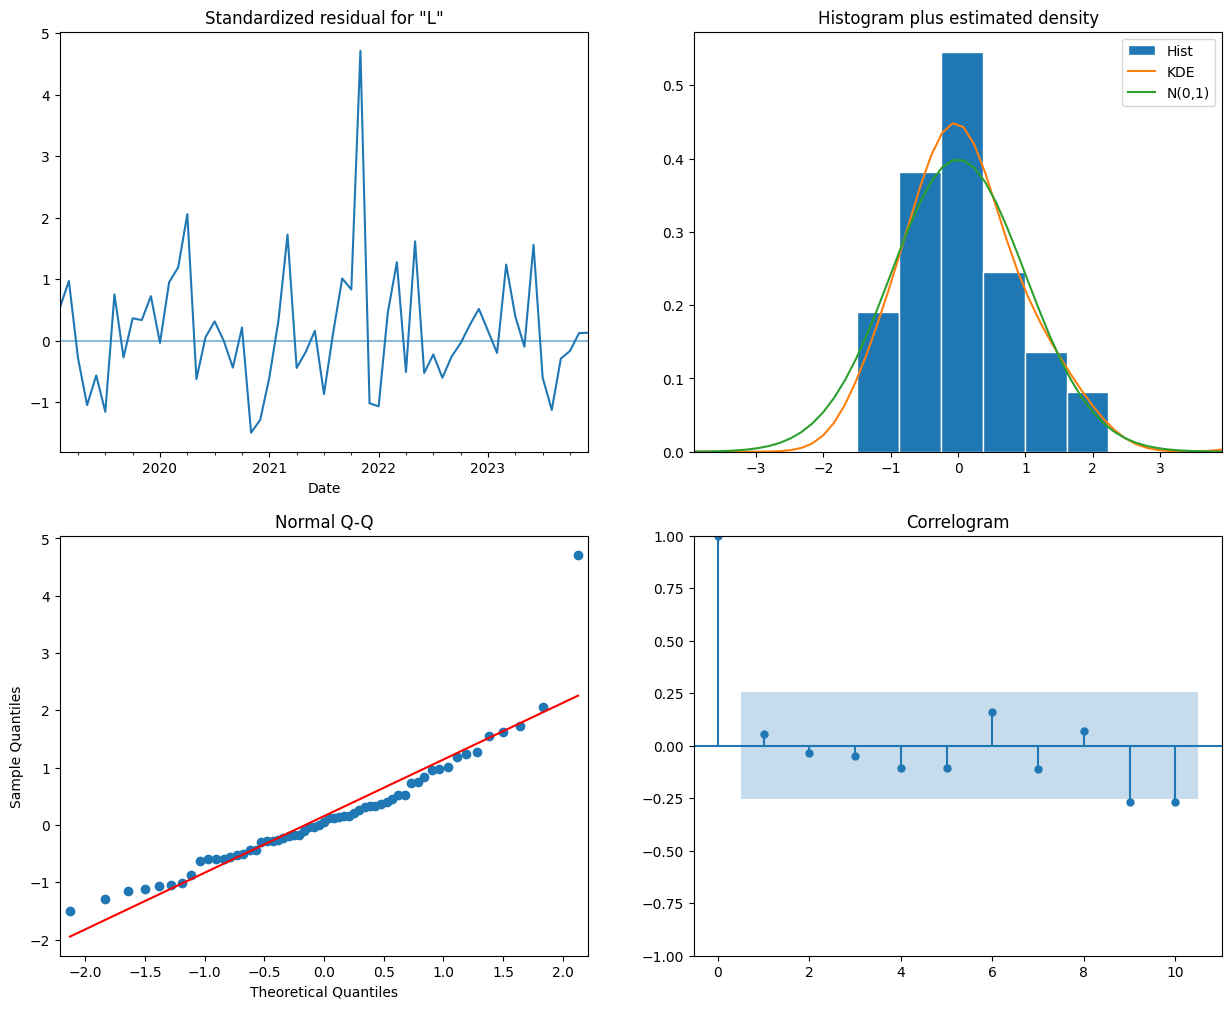

In [255]:
best_model.plot_diagnostics(figsize=(15, 12))
plt.show()

ar.L1 (AR term): A coefficient near 1 (0.9726) with a p-value effectively at 0 suggests a strong autoregressive effect. The previous value of the series is highly predictive of the current value. ma.L1 (MA term): The negative coefficient (-0.7116) is statistically significant, indicating that the model accounts for a moving average process where past errors are inversely related to current changes.

- Ljung-Box Test: The Q statistic with a p-value of 0.65 indicates no significant lack of fit or autocorrelation in the residuals, suggesting the model is adequate.
- Jarque-Bera Test: The JB statistic with a p-value near 0 indicates the residuals are not normally distributed, which is confirmed by the skewness and kurtosis values, indicating a skewed distribution with heavy tails.

The model shows a strong relationship between the past and current values of domestic loan volumes and captures the variability in the data well. However, the non-normal distribution of residuals and the negative AIC value suggest that caution is needed when interpreting the model results. It may also point towards overfitting, which can happen with small datasets as is our case.

#### Conclusion

The analysis revealed that search trends for key economic terms provide a unique dimension for assessing public sentiment in relation to economic conditions. Specifically, we observed that high public search volumes corresponded to significant economic events or shifts, suggesting that search data might serve as a leading indicator of economic sentiment and, potentially, future economic activity.

The time series regression models developed as part of the study provided valuable predictions and highlighted the dependencies between past and current values within the economic series examined. For instance, a strong autoregressive effect was observed in domestic loan volumes, suggesting that previous values are highly predictive of current trends. However, it is important to note that while the models were adept at capturing the variability in the data, some diagnostics pointed towards the potential for overfitting, non-normal distribution of residuals, and heteroskedasticity, particularly in the model for exchange rates. 

The high correlation between exchange rates and domestic loan volumes underscored the significant role of currency valuation in influencing domestic lending and, by extension, the broader economic activity. This relationship, along with the correlations observed between exchange rates and other economic indicators such as export volumes, highlights the interconnectedness of different economic variables and the complex nature of the economic landscape.

The study contributes to our understanding of how search data can reflect public interest and sentiment in economic matters. It opens up new avenues for integrating non-traditional data sources like Google Trends with traditional economic metrics to enhance the predictive power of economic models and analyses.